# 3.1 Discrete Uniform Random Variable

- A Variable take finite possible values equally likely 

- numpy.random.randint(low, high=None, size=None): Return random integers from low (inclusive) to high (exclusive).

- low :Lowest (signed) integer to be drawn from the distribution (unless high=None, in which case this parameter is the highest such integer).

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [39]:
number=10000000# define how many numbers we should draw from the population
A=pd.Series(np.random.randint(2,10,size=number))
A.value_counts().index

Int64Index([9, 4, 8, 2, 3, 7, 6, 5], dtype='int64')

[8 3 7 1 2 6 5 4]


([<matplotlib.axis.XTick at 0x7f121163de50>,
 <a list of 8 Text xticklabel objects>)

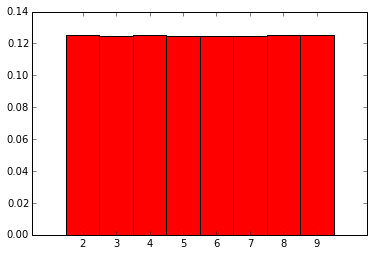

In [40]:
xticks=A.value_counts().index
x=np.array(xticks)-1#, with "-1", x take values [1,2,3,4,5,6,7,8], which is left end point of each bar. 
print x
width=1
y=A.value_counts().values/float(number) # without "/number", y is frequency; with"/number", y is relative frequency. 
ybarchart=plt.bar(x,y,width,color='r')
plt.xlim(0,10) #I add this line to define the range of x-axis. 
plt.xticks(x+0.5*width, xticks)

# 3.2 Continuous Uniform Random Variable

- A Variable taking possible values in $[a,b]$ equally likely 
- numpy.random.uniform(low=0.0, high=1.0, size=None): (includes low, but excludes high). 


In [41]:
A=np.random.uniform(low=2.0,high=5.0,size=100000000)
print A

[ 4.43064184  2.96236655  3.0918453  ...,  3.22076722  2.82933911
  4.00199309]


(0, 0.5)

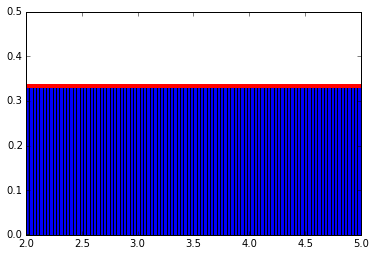

In [5]:
count, bins, ignored = plt.hist(A, 100, normed=True)

#print bins
#print count
plt.plot(bins, 0.3333*np.ones_like(bins), linewidth=4, color='r')
plt.ylim(0,0.5)

**Probability Density function (pdf)**

**Cumulative Density function (cdf)**: $cdf(0.5)=P(X\le 0.5)$

Compute $P(2.5<x<2.9)$

In [6]:
height=0.3333333
width=2.9-2.5
print "prob is equal to ", height*width

prob is equal to  0.13333332


In [7]:
1.0/(5-2)

0.3333333333333333

## Area and Probability
As opposed to the discrete random variables, continuous random variables represent draws from a population of values so dense that it is easier to model the shape of population by a smooth  continuous functions. 
<img src="http://static.pythontrade.com/public/PIC/ISOM2500/distribution/conrv.PNG">

- The blue-colored area under the probability curve f(x) from the value x = a to x = b is the probability that x could take any value in the range a to b
- Symbolized as $P(a\le x\le b)$ , Or as $P(a < x < b)$, because each of the interval endpoints has a probability of 0



# 3.3 Normal Random Variable

**Normal Random variable X:** value drawn randomly from normal  population with mean equal $\mu$ and variance equal to $\sigma^2$ 
<img src="http://static.pythontrade.com/public/PIC/ISOM2500/distribution/normg.PNG">


**Probability density function:**<img src="http://static.pythontrade.com/public/PIC/ISOM2500/distribution/normfunc.PNG">

- numpy.random.normal(loc=0.0, scale=1.0, size=None)

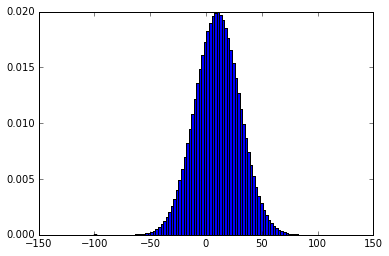

In [59]:
A= np.random.normal(10,20,size=100000000)
plt.figure()
A_hist=plt.hist(A,bins=100,normed=True)

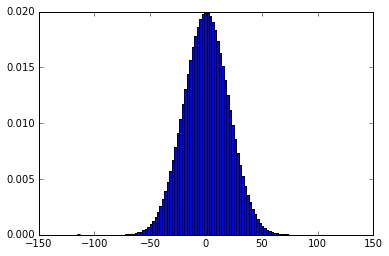

In [47]:
A10_hist=plt.hist(A-10,bins=100,normed=True)

(-150, 150)

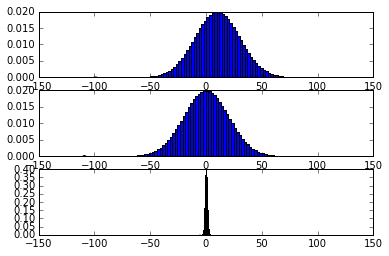

In [60]:
plt.subplot(3,1,1)
plt.hist(A,bins=100,normed=True)
plt.xlim(-150,150)
plt.subplot(3,1,2)
plt.hist(A-10,bins=100,normed=True)
plt.subplot(3,1,3)
plt.hist((A-10)/20,bins=100,normed=True)
plt.xlim(-150,150)

**Standard Normal Random Variable and standardization**

<img src="http://static.pythontrade.com/public/PIC/ISOM2500/distribution/z.PNG">
- numpy.random.randn(d0, d1, ..., dn):Return a sample (or samples) from the “standard normal” distribution.



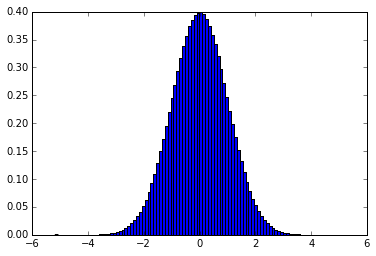

In [62]:
B=np.random.randn(10000000)
B_hist=plt.hist(B,bins=100,normed=True)

**Find probability for normal random variable**: $X$~$N(5,36)$,find  $P(0<X<7)$

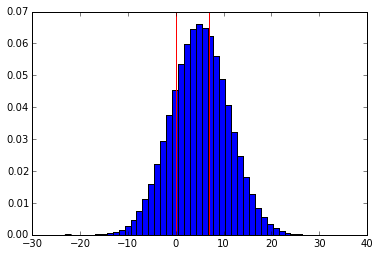

In [65]:
Q1=np.random.normal(5,6,1000000)
plt.figure()
question1=plt.hist(Q1, bins=50, normed=True )
plt.axvline(x=0,color='r')
plt.axvline(x=7,color='r')

Method 1: Simulation  

In [71]:
r1=np.array([1,2,3,4,5,6,7,8])
r2=r1[r1>5]
print r2

[6 7 8]


In [74]:
A= np.random.normal(5,6,size=1000000000)
B=A[A>0]
C=B[B<7]
print len(C)/float(len(A))

0.428254291


Method 2. Build-in function 
$$P(X<7)-P(x<0)$$

In [66]:
from  scipy.stats import norm
print norm.cdf(7,5,6)-norm.cdf(0,5,6)

0.428230278855


$$P(X>10)$$

In [67]:
print 1-norm.cdf(10,5,6)

0.202328380964


- cdf: cumulative distribution function, norm.cdf(value,mean,std)
- cdf(value, mean,standard deviation)
- For example: norm.cdf(1) means $P(z\le 1)$

**Find quatiles**: Find a such that $P(X>a)=0.05$ with $X$~$N(5,36)$
- scipy.stats.norm.ppf(percentage,mean,standard deviation)

In [32]:
norm.ppf(0.95,5,6)

14.869121761708833

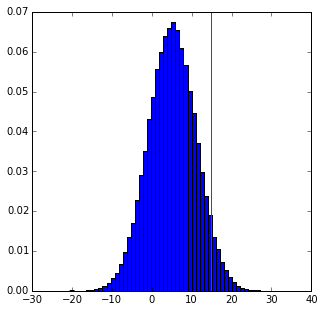

In [37]:
plt.figure(figsize=(5,5))
std_plot=plt.hist(np.random.normal(5,6,100000),bins=50,normed=True)
plt.axvline(x=14.869,color='r')

We also can standardize the problem $P(z>\frac{a-5}{6})=0.05$

1.64485362695
14.8691217617


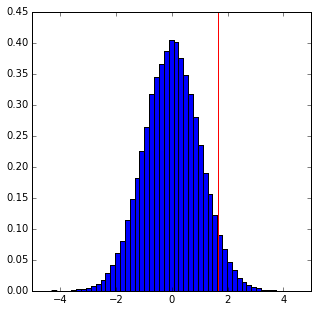

In [36]:
print norm.ppf(0.95,0,1)
print norm.ppf(0.95,0,1)*6+5
plt.figure(figsize=(5,5))
std_plot=plt.hist(np.random.normal(0,1,100000),bins=50,normed=True)
plt.axvline(x=1.6448,color='r')

**Question:(Value at Risk)**
<img src="http://static.pythontrade.com/public/PIC/ISOM2500/distribution/pnl.PNG">

**VaR**: Now consider pnl of an investment  with normal  distribution,  mean =4 and variance =25,  find the 3% VaR ?


In [78]:
print "3% VaR is:", norm.ppf(0.03, 4, 5)

print "it means, there is only 3% chance to lose more than", norm.ppf(0.03, 4, 5)

3% VaR is: -5.40396804076
it means, there is only 3% chance to lose more than -5.40396804076
